# n度定規?

角度が$45^\circ, 90^\circ, 45^\circ$である三角形の三辺の比は$1:1:\sqrt{2}$であるらしい。

角度が$60^\circ, 90^\circ, 30^\circ$である三角形の三辺の比は$1:\sqrt{3}:2$であるらしい。

角度が$75^\circ, 90^\circ, 15^\circ$である三角形の三辺の比は$\sqrt{6} - \sqrt{2}:\sqrt{6} + \sqrt{2}:4$であるらしい。

しかしながら、このようにして根号だけを用いて角度→三辺の比の変換ができるような角度は限られている。

例えば、$\sin 1^\circ$はルートだけを用いて表すことはできない。（多分）

では、どのような条件で根号だけを用いて角度→三辺の比の変換ができるのだろうか？調べてみようと思う。

以下に示す図は、sympyのtrigsimp関数などを使って$0 \geqq n \geqq 90$の範囲で$\sin n^\circ$を可能な限り根号のある形に変換したものである。

In [1]:
%matplotlib inline

from sympy import *
from sympy.geometry import *
import matplotlib.pyplot as plt
import matplotlib.lines as mpl_lines
from matplotlib.path import Path
import matplotlib.patches as patches

init_printing()

import math
import numpy

xlim = (-2,2)
ylim = (-2,2)

def slope_from_points(point1, point2):
    return (point2.y - point1.y)/(point2.x - point1.x)

def get_xlim_value(point1, point2):
    # plot the secant
    slope = slope_from_points(point1, point2)
    intercept = point1.y - slope*point1.x
    # update the points to be on the axes limits
    if point1.x == point2.x:
        data_x = (point1.x, point1.x)
        data_y = ylim
    else:
        data_x = xlim
        data_y = (xlim[0]*slope+intercept, ylim[1]*slope+intercept)
    return data_x, data_y

try:
    currentobjs = currentobjs
except NameError:
    currentobjs = []

def plot(obj, selected, name=""):
    if type(obj) == list:
        for i in obj:
            plot(i,selected)
    if type(obj) == Point2D:
        if selected == False:
            plt.plot(obj.x, obj.y, 'ro')
        else:
            plt.plot(obj.x, obj.y, 'o', color="orange")
        plt.annotate(name, (obj.x,obj.y), fontsize=16, color=(0.5,0.1,0.1))
    if type(obj) == Segment:
        # plt.axes().add_line(mpl_lines.Line2D((obj.p1.x, obj.p2.x), (obj.p1.y, obj.p2.y)))
        if selected == False:
            plt.plot([obj.p1.x, obj.p2.x], [obj.p1.y, obj.p2.y], 'b-')
        else:
            plt.plot([obj.p1.x, obj.p2.x], [obj.p1.y, obj.p2.y], '-', color="orange", linewidth=2)
    if type(obj) == Line:
        coor = get_xlim_value(obj.p1,obj.p2)
        if selected == False:
            plt.plot(coor[0], coor[1], 'b-')
        else:
            plt.plot(coor[0], coor[1], '-', color="orange", linewidth=2)
    if type(obj) == Polygon or type(obj) == Triangle:
        verts = []
        codes = []
        
        for k,v in enumerate(obj.vertices):
            verts.append((v.x, v.y))
            if k == 0:
                codes.append(Path.MOVETO)
            else:
                codes.append(Path.LINETO)
        verts.append((obj.vertices[0].x, obj.vertices[0].y))
        codes.append(Path.CLOSEPOLY)
        
        path = Path(verts, codes)
        if selected == False:
            patch = patches.PathPatch(path, facecolor=(0,1,0.5,0.5), edgecolor="none", lw=1)
        else:
            patch = patches.PathPatch(path, facecolor=(1,0.5,0,0.5), edgecolor="none", lw=2)
        plt.gca().add_patch(patch)

def draw(*objs, add_currentobjs=True, sizex=16, sizey=None, colcount=2, rowcount=None):
    
    if rowcount == None:
        rowcount = math.ceil(len(objs) / colcount)
    
    if sizey == None:
        sizey = len(objs)*sizex/colcount/colcount
    
    plt.figure(figsize=(sizex,sizey))
    for index, obj in enumerate(objs):
        plt.subplot(rowcount, colcount, index+1)
        
        plt.gca().set_xlim(xlim)
        plt.gca().set_ylim(ylim)
        plt.gca().set_aspect('equal')
        
        for currentobj in currentobjs:
            plot(currentobj["obj"], False, name=currentobj.get("name", ""))
        plot(obj["obj"], True, name=obj.get("name", ""))
        
        if add_currentobjs:
            currentobjs.append(obj)
            plt.title(str(len(currentobjs)))
        
        if obj.get("title"):
            plt.title(obj.get("title"))
    
    plt.show()

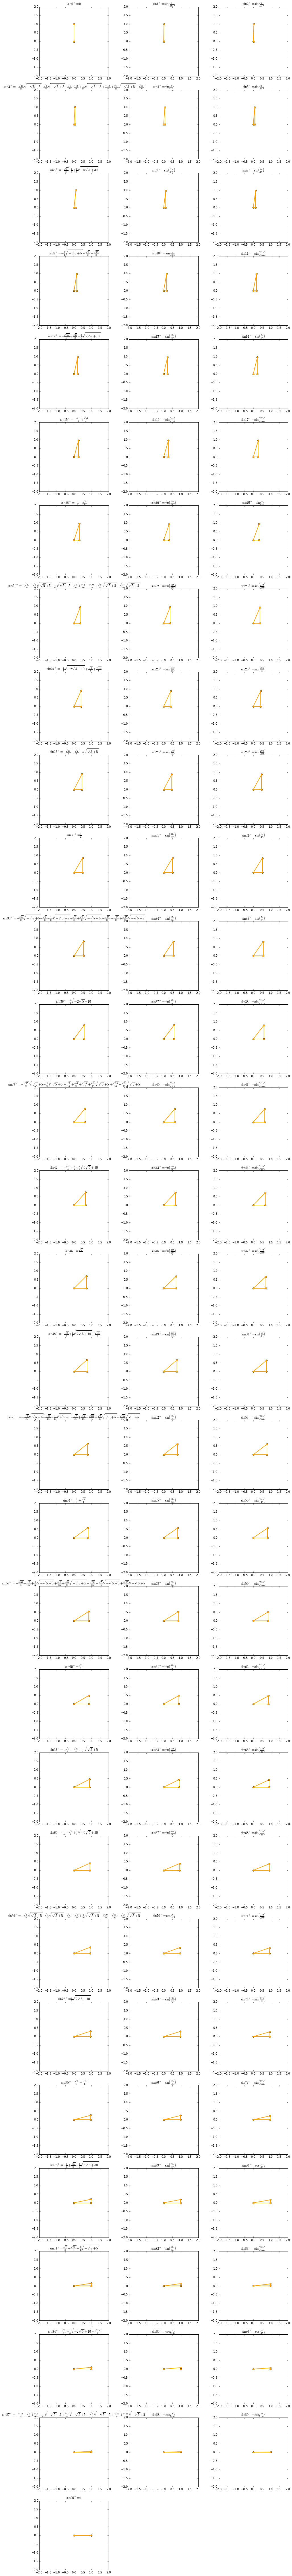

In [2]:
objs = []
formulas = []
currentobjs = []

for i in range(0, 91):
    A = Point2D(0,0)
    B = Point2D(sin(i*pi/180),0)
    C = Point2D(sin(i*pi/180),cos(i*pi/180))
    s = Segment(A, B)
    t = Segment(B, C)
    u = Segment(C, A)
    formulas.append(expand(sqrtdenest(simplify(radsimp(factor(trigsimp(B.x)))))))
    objs.append({"obj": [A,B,C,s,t,u], "title":r"$\sin " + str(i) + r"^\circ = " + latex(formulas[i]) + r"$"})

draw(*objs, add_currentobjs=False, colcount=3)

In [3]:
import pandas as pd

pd.set_option('display.max_rows', len(formulas))
pd.set_option('max_colwidth', 3000)
df = pd.DataFrame({"$\sin n^\circ$": list(map(lambda x: "$" + latex(x) + "$", formulas))})
df.style.apply(lambda x: ['background-color: rgb(' + str(240 - len(formulas[x.name].args)*10) + ', ' + str(255 - len(formulas[x.name].args)*3) + ', 255)'] if type(formulas[x.name]) != sin and type(formulas[x.name]) != cos else ['background-color: #ffefe0'], axis=1)